Initial Data:
   pos  flw  flg   bl  pic  lin   cl   cz   ni    erl   erc     lt   hc   pr  \
0   44   48  325   33    1    0   12  0.0  0.0   0.00  0.00  0.000  0.0  0.0   
1   10   66  321  150    1    0  213  0.0  1.0  14.39  1.97  0.000  1.5  0.0   
2   33  970  308  101    1    1  436  0.0  1.0  10.10  0.30  0.000  2.5  0.0   
3   70   86  360   14    1    0    0  1.0  0.0   0.78  0.06  0.000  0.0  0.0   
4    3   21  285   73    1    0   93  0.0  0.0  14.29  0.00  0.667  0.0  0.0   

      fo        cs          pi class  
0  0.000  0.111111    0.094985     f  
1  0.000  0.206826  230.412857     f  
2  0.056  0.572174   43.569939     f  
3  0.000  1.000000    5.859799     f  
4  0.000  0.300494    0.126019     f  
Unique values in 'class': ['f' 'r']
Encoded target unique values: [0 1]
Data Summary Statistics:
               count          mean            std   min         25%  \
pos            400.0    226.197500     920.888758   0.0   14.000000   
flw            400.0  12050.5700

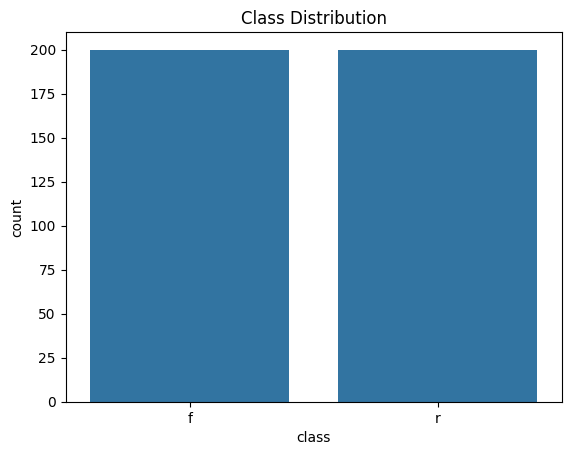

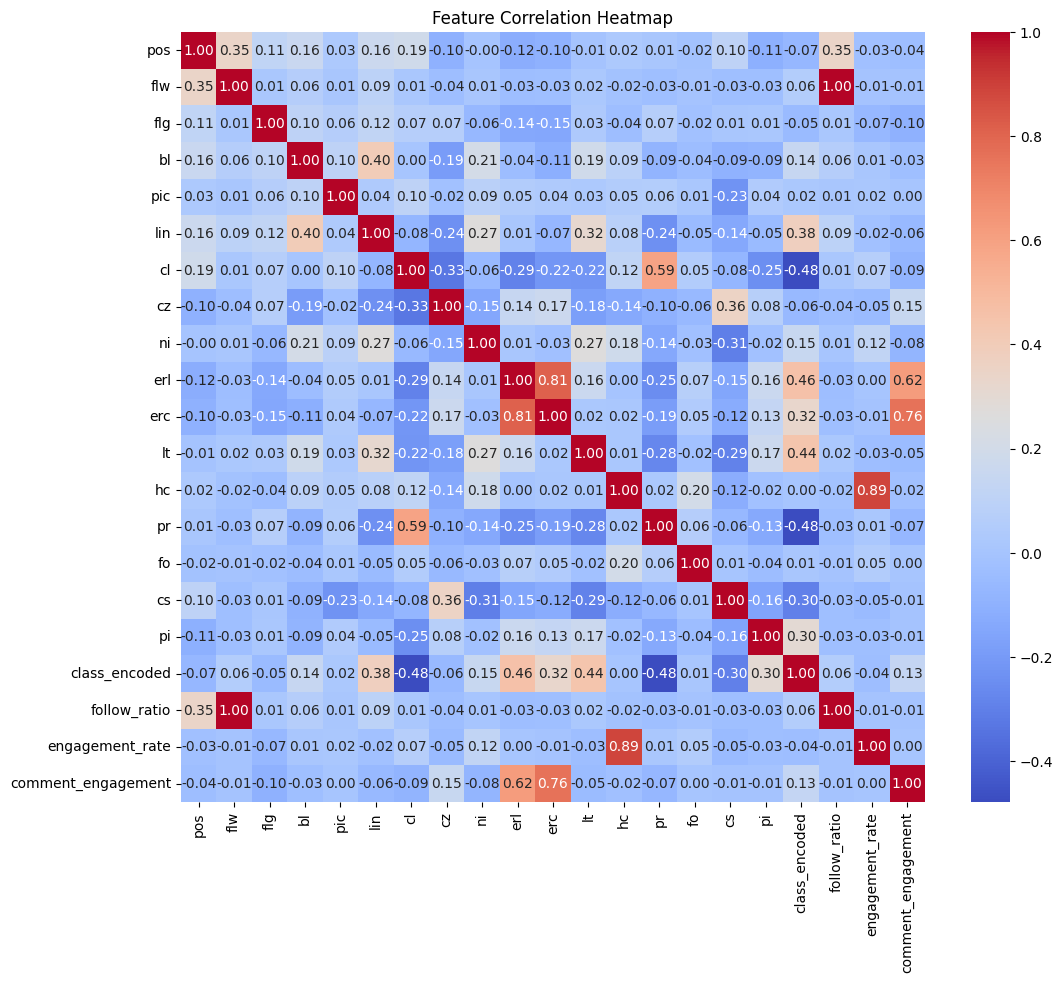

Data shape after outlier removal: (329, 22)
Removed 1 redundant features due to high correlation: ['follow_ratio']
Selected features after feature selection: ['lin', 'cl', 'erl', 'erc', 'lt', 'pr', 'cs']

Training set size: (263, 7)
Testing set size: (66, 7)

Model: Logistic Regression
Test Accuracy: 0.8939393939393939
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.86      0.94      0.90        32

    accuracy                           0.89        66
   macro avg       0.90      0.90      0.89        66
weighted avg       0.90      0.89      0.89        66



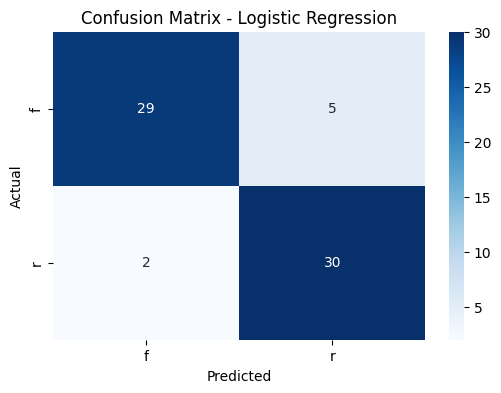


Model: Random Forest
Test Accuracy: 0.9242424242424242
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.89      0.97      0.93        32

    accuracy                           0.92        66
   macro avg       0.93      0.93      0.92        66
weighted avg       0.93      0.92      0.92        66



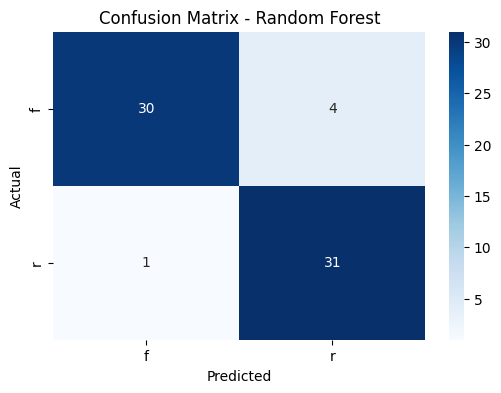


Model: SVM
Test Accuracy: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       0.81      0.94      0.87        32

    accuracy                           0.86        66
   macro avg       0.87      0.87      0.86        66
weighted avg       0.87      0.86      0.86        66



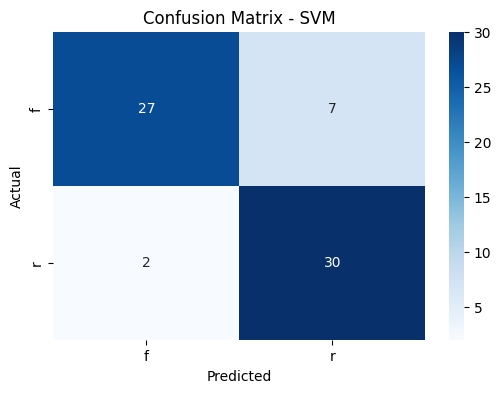


Model: Gradient Boosting
Test Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.86      0.97      0.91        32

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.92      0.91      0.91        66



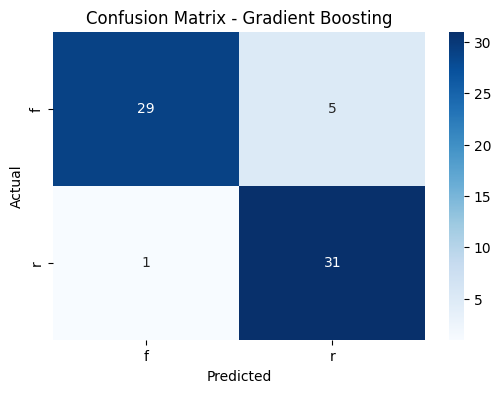


Model: Naive Bayes
Test Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        34
           1       0.84      1.00      0.91        32

    accuracy                           0.91        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.92      0.91      0.91        66



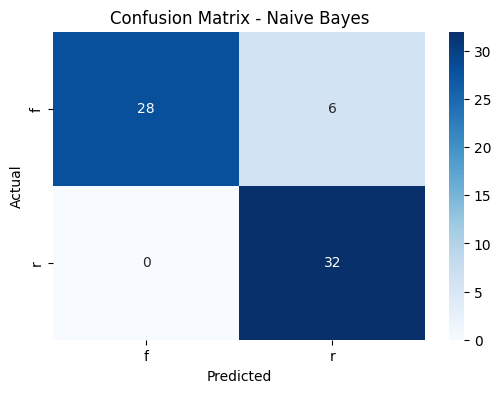


Model: K-Nearest Neighbors
Test Accuracy: 0.8939393939393939
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        34
           1       0.84      0.97      0.90        32

    accuracy                           0.89        66
   macro avg       0.90      0.90      0.89        66
weighted avg       0.90      0.89      0.89        66



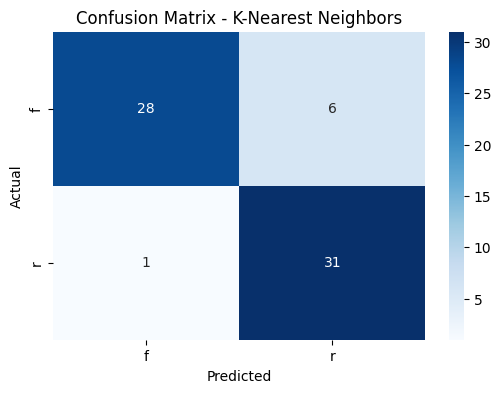


Model: XGBoost
Test Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.88      0.94      0.91        32

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



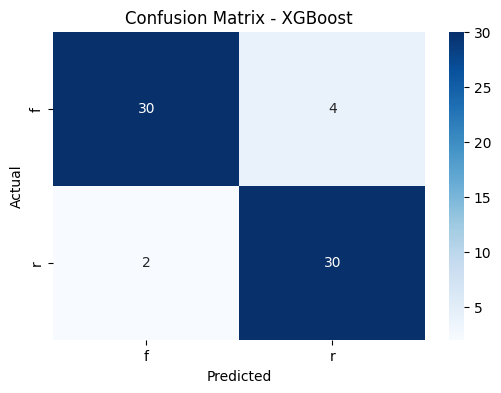

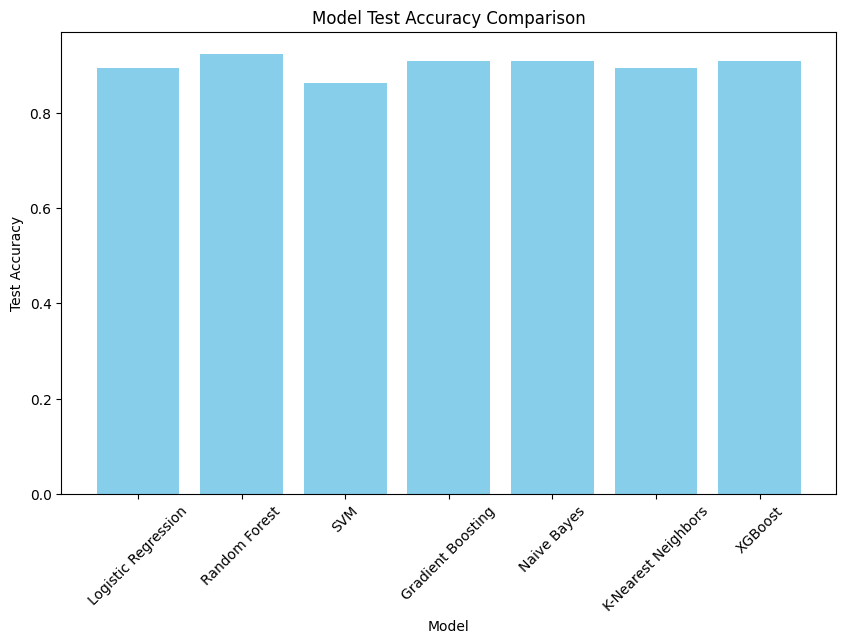

Logistic Regression ROC-AUC Score: 0.9623161764705882
Random Forest ROC-AUC Score: 0.9705882352941176
SVM ROC-AUC Score: 0.948529411764706
Gradient Boosting ROC-AUC Score: 0.9595588235294117
Naive Bayes ROC-AUC Score: 0.9558823529411764
K-Nearest Neighbors ROC-AUC Score: 0.9292279411764707
XGBoost ROC-AUC Score: 0.9678308823529412
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest ROC-AUC Score: 0.9710477941176471


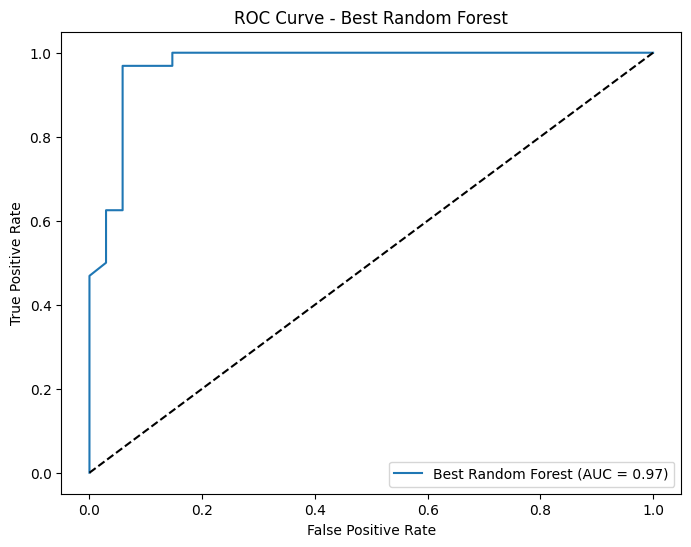

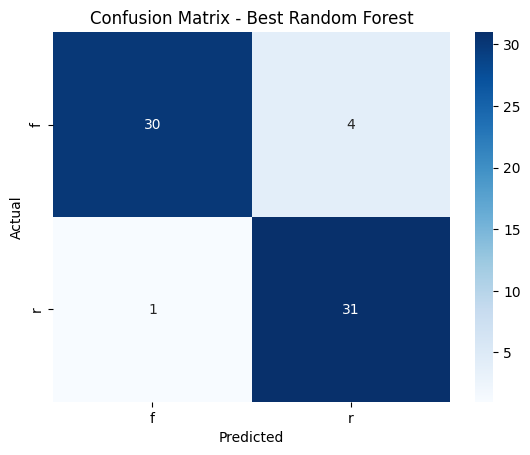

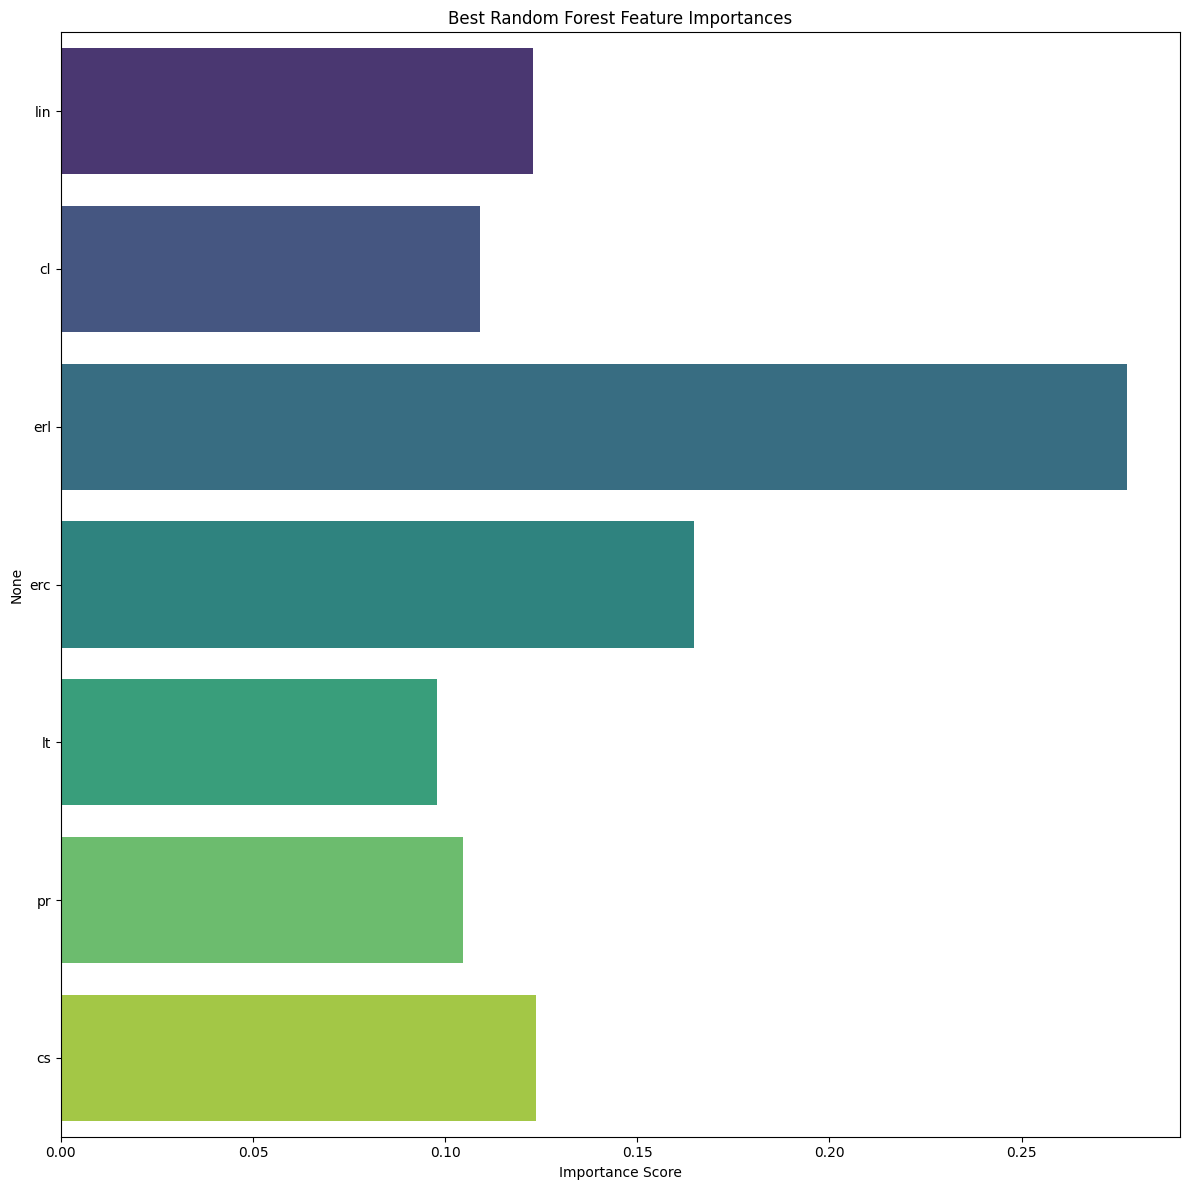

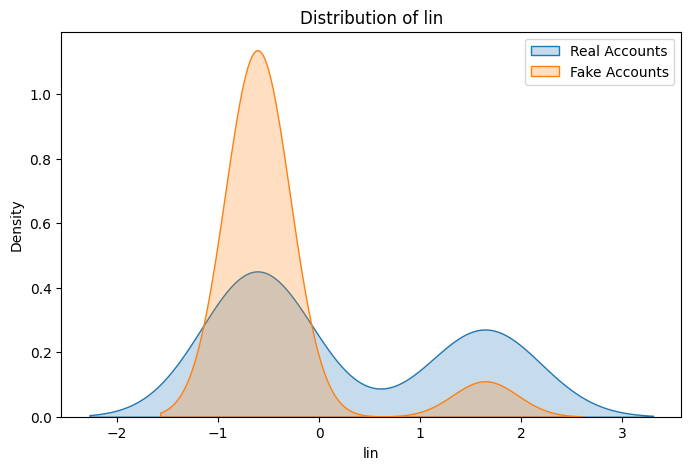

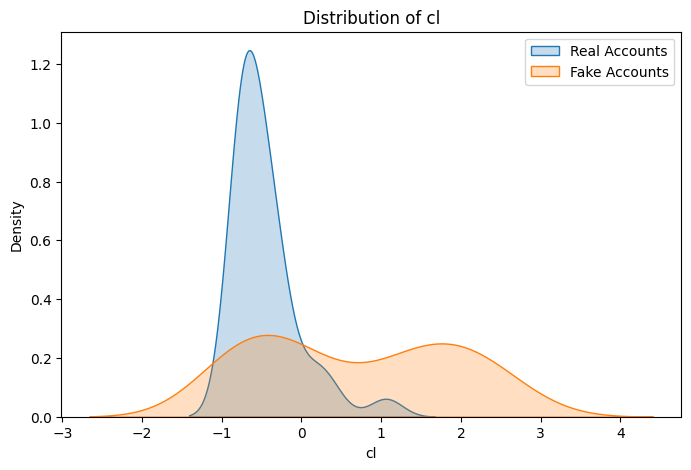

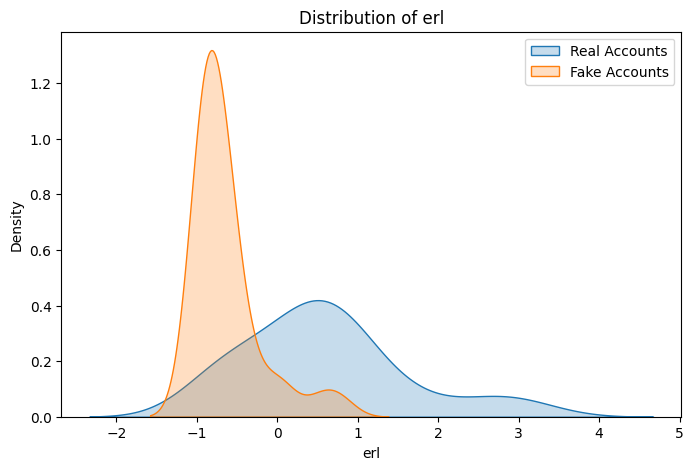

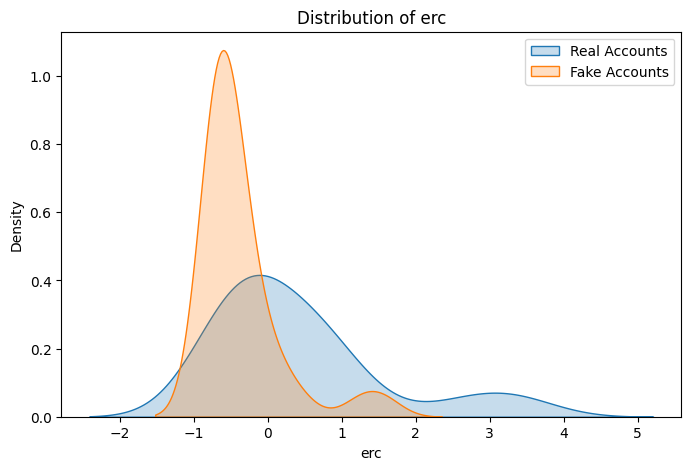

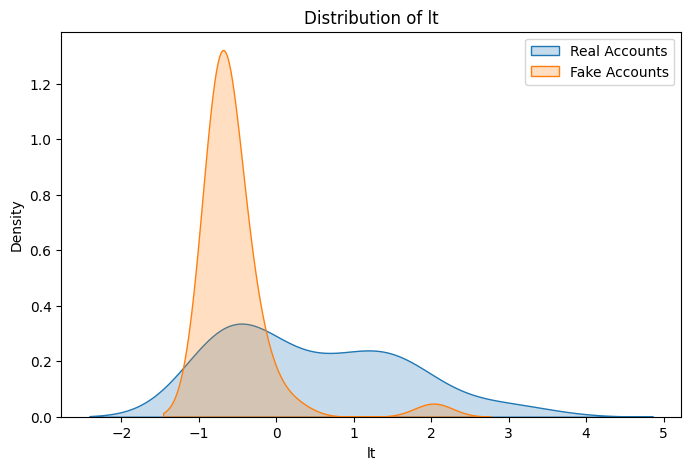

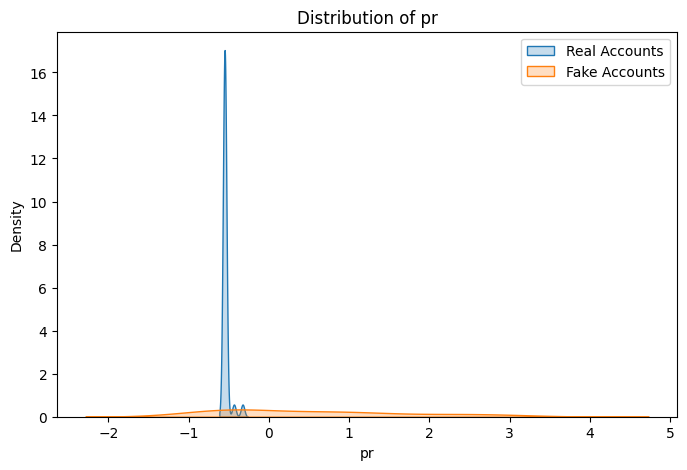

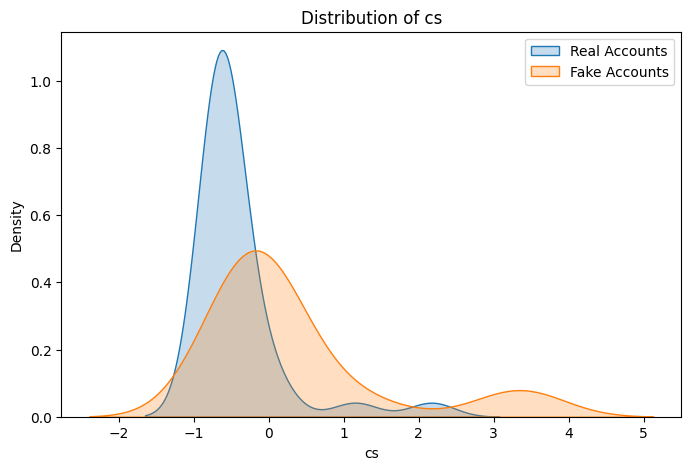

['scaler.pkl']

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for clarity

# Step 1: Load Dataset
data = pd.read_csv('FakeOrAuthentic.csv')
print("Initial Data:")
print(data.head())

# Step 2: Ensure Binary Classification for Target Variable
print("Unique values in 'class':", data['class'].unique())
data = data[data['class'].isin(['f', 'r'])]  # Filter out unexpected values

# Encode target variable
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])
print("Encoded target unique values:", data['class_encoded'].unique())

# Step 3: Data Exploration
# Summary statistics
print("Data Summary Statistics:")
print(data.describe().T)

# Check class balance
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

# Step 4: Missing Value Imputation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Step 5: Feature Engineering
data['follow_ratio'] = data['flw'] / (data['fo'] + 1)
data['engagement_rate'] = data['hc'] / (data['flw'] + 1)
data['comment_engagement'] = data['erc'] / (data['flw'] + 1)

# Step 6: Correlation Heatmap for Features (only numeric columns)
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 7: Outlier Detection and Handling with Z-score
z_scores = np.abs(stats.zscore(data[numeric_columns]))
data = data[(z_scores < 3).all(axis=1)]
print("Data shape after outlier removal:", data.shape)

# Step 8: Splitting Features and Target Variable
X = data.drop(columns=['class', 'class_encoded'])  # Drop original and encoded target
y = data['class_encoded']

# Step 9: Standardize Numeric Features
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns  # Redefine after feature engineering
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Step 10: Remove Highly Correlated Features
corr_matrix = X.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlation_threshold = 0.85
redundant_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
X = X.drop(columns=redundant_features)
print(f"Removed {len(redundant_features)} redundant features due to high correlation: {redundant_features}")

# Step 11: Apply Feature Selection using Embedded Method
from sklearn.feature_selection import SelectFromModel
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
selector = SelectFromModel(rf_model, threshold="mean", prefit=True)
X = X.loc[:, selector.get_support()]  # Update X with selected features only
print("Selected features after feature selection:", X.columns.tolist())

# Step 12: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Step 13: Model Initialization and Training with Cross-Validation
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Model Evaluation Using Testing Set
model_accuracies = {}  # Dictionary to store model accuracies for bar chart

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store Test Accuracy for Bar Chart
    model_accuracies[model_name] = accuracy_score(y_test, y_pred)

    # Print Test Accuracy and Classification Report
    print(f"\nModel: {model_name}")
    print("Test Accuracy:", model_accuracies[model_name])
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Step 14: Bar Chart for Model Test Accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Step 15: ROC-AUC Comparison for All Models
for model_name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_probs)
    print(f"{model_name} ROC-AUC Score:", roc_score)

# Step 16: Hyperparameter Tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Step 17: ROC Curve and Confusion Matrix for Best Model
y_probs_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
roc_score_best_rf = roc_auc_score(y_test, y_probs_best_rf)
print("\nBest Random Forest ROC-AUC Score:", roc_score_best_rf)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_best_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Best Random Forest (AUC = {roc_score_best_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest')
plt.legend(loc='best')
plt.show()

# Confusion Matrix for Best Random Forest Model
cm = confusion_matrix(y_test, best_rf_model.predict(X_test))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Random Forest')
plt.show()

# Step 18: Feature Importance for Best Random Forest Model
plt.figure(figsize=(12, 12))
sns.barplot(x=best_rf_model.feature_importances_, y=X.columns, palette="viridis")
plt.title("Best Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()  # Adjust layout to avoid cutting off parts of the plot
plt.show()

# Step 19: Distribution Analysis of Top Features
top_features = ['lin', 'cl', 'erl', 'erc', 'lt', 'pr', 'cs']

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(X_test[feature][y_test == 1], label='Real Accounts', shade=True)
    sns.kdeplot(X_test[feature][y_test == 0], label='Fake Accounts', shade=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


# Step 20: Save Model and Scaler
import joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
import joblib

# Step 1: Load Dataset
data = pd.read_csv('FakeOrAuthentic.csv')

# Step 2: Ensure Binary Classification for Target Variable
data = data[data['class'].isin(['f', 'r'])]

# Encode target variable
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])

# Step 3: Missing Value Imputation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Step 4: Feature Engineering
data['follow_ratio'] = data['flw'] / (data['fo'] + 1)
data['engagement_rate'] = data['hc'] / (data['flw'] + 1)
data['comment_engagement'] = data['erc'] / (data['flw'] + 1)

# --- Place the new code here ---
# Use only the selected features for training
X = data[['lin', 'cl', 'erl', 'erc', 'lt', 'pr', 'cs']]
y = data['class_encoded']
# -------------------------------

# Step 5: Standardize Numeric Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 7: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)
print("Model Evaluation:")
print(classification_report(y_test, y_pred))

# Step 9: Save the Model and Scaler
joblib.dump(model, 'best_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.86      0.95      0.90        40

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



['scaler.pkl']

In [ ]:
best_params_df = pd.DataFrame([grid_search_rf.best_params_])  # Convert to DataFrame
print("\nBest Random Forest Parameters:")
display(best_params_df)


Best Random Forest Parameters:


,max_depth,min_samples_split,n_estimators
0,10,2,100



Model Comparison Table:


,Accuracy,ROC-AUC
Logistic Regression,0.893939,0.965625
Random Forest,0.924242,0.984688
SVM,0.863636,0.968750
Gradient Boosting,0.909091,0.976250
Naive Bayes,0.909091,0.951875
K-Nearest Neighbors,0.893939,0.973125
XGBoost,0.909091,0.917500


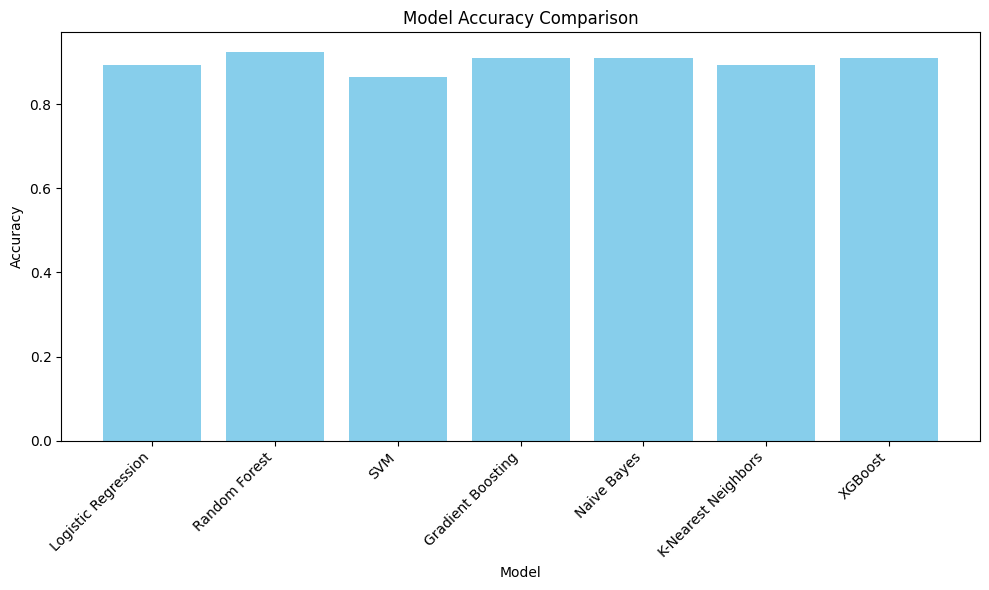

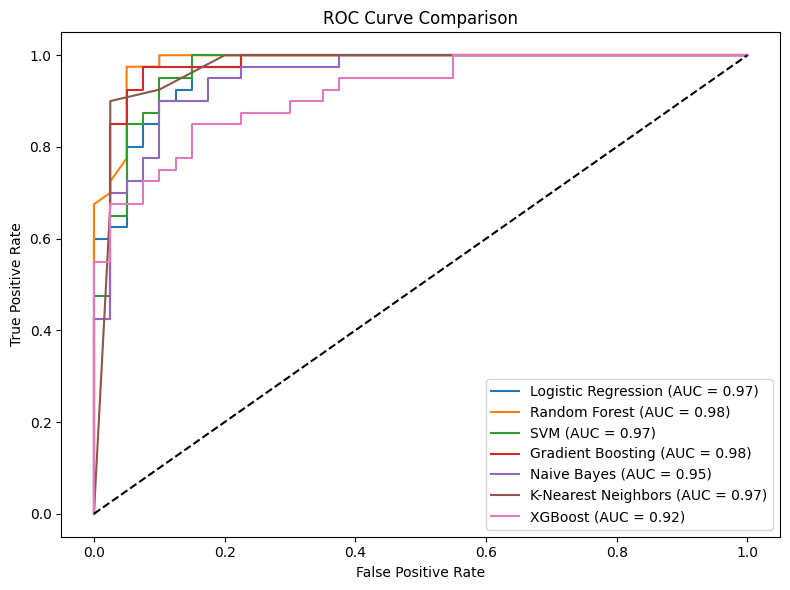

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ... (Your existing code for model training and evaluation) ...

# Store ROC-AUC scores
model_roc_auc = {}
for model_name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_probs)
    model_roc_auc[model_name] = roc_score

# Create comparison DataFrame
results_df = pd.DataFrame({'Accuracy': model_accuracies, 'ROC-AUC': model_roc_auc})
print("\nModel Comparison Table:")
display(results_df)

# Bar chart for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {model_roc_auc[model_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

results_df = pd.DataFrame({'Accuracy': model_accuracies, 'ROC-AUC': model_roc_auc})

# Calculate cross-validation scores
model_cv_scores = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    avg_cv_score = cv_scores.mean()
    model_cv_scores[model_name] = avg_cv_score

# Add cross-validation scores to DataFrame
results_df['Cross-Validation Accuracy'] = results_df.index.map(model_cv_scores)

# Sort by accuracy and reset index to add serial numbers
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index()
results_df.index = results_df.index + 1  # Start serial number from 1
results_df = results_df.rename_axis('Serial No.')

print("\nModel Comparison Table (Sorted by Accuracy - Ascending):")
display(results_df)


Model Comparison Table (Sorted by Accuracy - Ascending):


,index,Accuracy,ROC-AUC,Cross-Validation Accuracy
Serial No.,,,,
1,Random Forest,0.924242,0.984688,0.9200
2,Gradient Boosting,0.909091,0.976250,0.9200
3,Naive Bayes,0.909091,0.951875,0.8900
4,XGBoost,0.909091,0.917500,0.9375
5,Logistic Regression,0.893939,0.965625,0.9125
6,K-Nearest Neighbors,0.893939,0.973125,0.9000
7,SVM,0.863636,0.968750,0.9200


In [ ]:
import pickle

# Save model and scaler to .pkl files
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [ ]:
from google.colab import files

files.download('best_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>